In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import Bio
from Bio.Restriction import Restriction, AllEnzymes
from Bio.Seq import Seq
import RNA
import random
import sys
import os
sys.path.insert(1,'/Users/daniel/Documents/python_scripts/')
# sys.path.insert(1, os.getcwd() + '/python_scripts/')
import coding_notebook
import dinuc_codon_shuffle


In [2]:
coding_notebook.function_list()

['countdown',
 'minimum_free_energies',
 'sequences',
 'nt_freqs',
 'random_rna',
 'random_rna_with_gc_au',
 'occurrences',
 'dinuc_count',
 'nuc_freq',
 'nucleotide_shuffle',
 'generate_codon_table',
 'generate_reverse_codon_table',
 'get_complement',
 'list_filter',
 'no_ss_sequence',
 'complementarity',
 'coefficients',
 'XYchooseN',
 'sequence_titles',
 'fitted_eq',
 'discrete_derivative',
 'sequences_structures_rnafold',
 'dinucleotide_shuffle',
 'dns_freq',
 'point_mutations',
 'map_of_occurrences',
 'codon_optimization',
 'codon_positions',
 'rnafold_to_dataframe',
 'nt_repeat_domains',
 'bp_distance_count',
 'rnafold_to_dataframe_ensemble',
 'secondary_structures',
 'codon_count',
 'sequences_dnc',
 'hairpin_count',
 'base_pairs',
 'base_pairs_distances',
 'rnafold_to_dataframe_2',
 'extract_coding_regions',
 'seperate_coding_regions',
 'rnafold_to_dataframes_20221218',
 'get_directories',
 'read_bp_ps_file']

In [3]:
# Constants
date = datetime.now()
date = date.strftime('%Y%m%d')


In [4]:
# Paths
paths = os.getcwd() + '/../'

paths = {
    'plots' : paths + 'plots/',
    'dataframes' : paths + 'dataframes/',
    'fasta_files' : paths + 'fasta_files/',
    'rnafold_outputs' : paths + 'rnafold_outputs/',
}


In [5]:
# Path add-ons
paths['plots_seq_w_no_ss'] = paths['plots'] + 'seq_w_no_ss/'
paths['dataframes_seq_w_no_ss'] = paths['dataframes'] + 'seq_w_no_ss/'
paths['fasta_files_seq_w_no_ss'] = paths['fasta_files'] + 'seq_w_no_ss/'
paths['rnafold_outputs_seq_w_no_ss'] = paths['rnafold_outputs'] + 'seq_w_no_ss/'


# Functions

In [6]:
def select_and_remove_random_element(my_list):
    if not my_list:
        raise ValueError("List is empty")
    random_index = random.randrange(len(my_list))
    selected_element = my_list[random_index]
    new_list = my_list[:random_index] + my_list[random_index+1:]
    return selected_element, new_list


In [7]:
def remove_element_from_list(my_list, element):
    new_list = [x for x in my_list if x != element]
    return new_list


In [8]:
def filter_codons_by_nucleotides(codons, nucleotides):
    filtered_codons = [codon for codon in codons if codon.startswith(nucleotides)]
    return filtered_codons


In [9]:
def list_comparison(lst1, lst2):
    return [1 if i != j else 0 for i, j in zip(lst1, lst2)]


# Constants

In [10]:
# Codon-Table
codons = coding_notebook.generate_codon_table()
codons_rev = coding_notebook.generate_reverse_codon_table()

# Make codon list
codons_list = list(codons_rev.keys())


In [11]:
# List all the enzymes
enzyme_list = list(AllEnzymes)

# Initialize batch
batch = Restriction.RestrictionBatch()

# Add all the enzymes to the batch
for enzyme in enzyme_list:
    batch.add(enzyme)


# Generate a random sequence with no secondary-structure

In [12]:
# # How many sequences do you want to generate?
# num_of_seqs = 1000000

# # Initialize list of sequences
# sequences = []

# # Loop over how many sequences you wish to generate
# for _ in range(num_of_seqs):
    
#     # Start of the sequence & remove the codon from the list of available codons
#     sequence, codons_list_updated = select_and_remove_random_element(codons_list)

#     # Remove the complement codon from list as well
#     codons_list_updated = remove_element_from_list(codons_list_updated, Bio.Seq.complement_rna(sequence))
    
#     # Make a sub codon list where each codon first two nucleotides match the last two nucleotides in the sequence
#     codons_list_updated_sub = filter_codons_by_nucleotides(codons_list_updated, sequence[-2:])

#     # Randomly select a codon from sub list
#     codon, _ = select_and_remove_random_element(codons_list_updated_sub)

#     # Append the last nucleotide from the codon onto the list
#     sequence += codon[-1]
    
#     # Remove the codon from list
#     codons_list_updated = remove_element_from_list(codons_list_updated, codon)

#     # Remove the complement codon from list
#     codons_list_updated = remove_element_from_list(codons_list_updated, Bio.Seq.complement_rna(codon))

#     # Loop through updated codon list as long as it is not empty
#     while codons_list_updated:
        
#         # Make a sub codon list where each codon first two nucleotides match the last two nucleotides in the sequence
#         codons_list_updated_sub = filter_codons_by_nucleotides(codons_list_updated, sequence[-2:])
        
#         # Break out of while loop if there are no codons available in sub list
#         if not codons_list_updated_sub:
            
#             break

#         # Otherwise continue 
#         else:

#             # Randomly select a codon from sub list
#             codon, _ = select_and_remove_random_element(codons_list_updated_sub)
            
#             # Append the last nucleotide from the codon onto the list
#             sequence += codon[-1]

#             # Remove the codon from list
#             codons_list_updated = remove_element_from_list(codons_list_updated, codon)

#             # Remove the complement codon from list
#             codons_list_updated = remove_element_from_list(codons_list_updated, Bio.Seq.complement_rna(codon))     

#     # Add to list of sequences
#     sequences.append(sequence)
    
# # Convert into a dataframe
# sequences = pd.DataFrame({'Sequence' : sequences})

# # Remove 
# del sequence


In [13]:
# # Save dataframe
# sequences.to_pickle(paths['dataframes_seq_w_no_ss'] + '{}_sequences_w_no_ss.p'.format(date))


In [14]:
# Open dataframe
sequences = pd.read_pickle(paths['dataframes_seq_w_no_ss'] + '{}_sequences_w_no_ss.p'.format(20230224))


In [15]:
sequences.head(3)

,Sequence
0,AUGGUUUCUUAACGCAUAGUCCUA
1,UCCGCCCAGCAACCUAGUGCUUACAUAAGAG
2,AACAGACUUCAAAUGGGUAA


In [16]:
# Drop duplicates if any
sequences = sequences.drop_duplicates()

# Add length column
sequences['Length'] = sequences['Sequence'].apply(lambda x : len(x))

# Nucleotide frequency columns
for nt in list(set('ACGU')):
    sequences[f'{nt}'] = sequences['Sequence'].apply(lambda x : x.count(f'{nt}'))

# Nucleotide ratio column
sequences['GCAU'] = np.divide(np.add(sequences['G'], sequences['C']), np.add(sequences['A'], sequences['U']))


In [17]:
sequences.head(3)

,Sequence,Length,G,U,C,A,GCAU
0,AUGGUUUCUUAACGCAUAGUCCUA,24,4,9,5,6,0.600000
1,UCCGCCCAGCAACCUAGUGCUUACAUAAGAG,31,6,6,10,9,1.066667
2,AACAGACUUCAAAUGGGUAA,20,4,4,3,9,0.538462


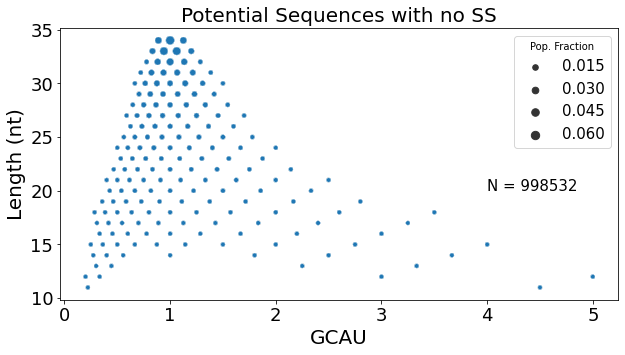

In [18]:
# Plot length vs GCAU
plt.figure(figsize = (10, 5))

# Add a count column to the dataframe
sequences['count'] = sequences.groupby(['Length', 'GCAU'])['Length'].transform('count')

# Normalize the count values
seq_count = sequences.shape[0]
sequences['Population Fraction'] = sequences['count'] / seq_count

g = sns.scatterplot(data = sequences, y = 'Length', x = 'GCAU', size = 'Population Fraction', alpha = 0.5)

plt.xlabel('GCAU', fontsize = 20)
plt.ylabel('Length (nt)', fontsize = 20)
plt.title('Potential Sequences with no SS', fontsize = 20)
plt.tick_params(axis = 'both', labelsize = 18)
plt.locator_params(axis = 'both', nbins = 8)
plt.text(4, 20, 'N = {}'.format(seq_count), fontsize = 15)
g.legend(fontsize = 15, title = 'Pop. Fraction')

plt.savefig(paths['plots_seq_w_no_ss'] + 'sequences_w_no_ss_b4_confirmation', transparent=True)

plt.show()

In [19]:
# Remove columns
sequences = sequences.drop(labels=['count', 'Population Fraction'], axis = 1)


In [20]:
# Filter by length
sequences = sequences[sequences['Length'] == 24]


In [21]:
sequences.head(3)

,Sequence,Length,G,U,C,A,GCAU
0,AUGGUUUCUUAACGCAUAGUCCUA,24,4,9,5,6,0.600000
68,UAGUCCAUAAGCAAUGCCUGAGAU,24,5,6,5,8,0.714286
100,UAGGCCUCACGUAUGUCUUGAUUA,24,5,9,5,5,0.714286


In [22]:
# Fold each sequence
# Initialize dictionaries
ss, mfe, bp = {}, {}, {}

# Loop through each row in the dataframe
for idx, row in sequences.iterrows():
    
    # Fold molecule
    fc = RNA.fold_compound(row['Sequence'])
    
    # Append the secondary structure and mfe to the dictionary
    ss[idx], mfe[idx] = fc.mfe()
    
    # Append base-pairing list
    bp[idx] = RNA.ptable(ss[idx])
        
# Add to dataframe
sequences['Secondary_Structure'] = ss.values()

sequences['Energy'] = mfe.values()

sequences['Base_Pairs'] = bp.values()

# Determine if sequence has structure
sequences['Structured'] = sequences['Secondary_Structure'].apply(lambda x : x != '.'*len(x))


In [23]:
sequences.head(3)

,Sequence,Length,G,U,C,A,GCAU,Secondary_Structure,Energy,Base_Pairs,Structured
0,AUGGUUUCUUAACGCAUAGUCCUA,24,4,9,5,6,0.600000,((((((....))).))).......,-1.3,"(24, 17, 16, 15, 13, 12, 11, 0, 0, 0, 0, 6, 5,...",True
68,UAGUCCAUAAGCAAUGCCUGAGAU,24,5,6,5,8,0.714286,..(((((...((...)).)).))),-0.2,"(24, 0, 0, 24, 23, 22, 20, 19, 0, 0, 0, 17, 16...",True
100,UAGGCCUCACGUAUGUCUUGAUUA,24,5,9,5,5,0.714286,.((((.........))))......,-0.5,"(24, 0, 18, 17, 16, 15, 0, 0, 0, 0, 0, 0, 0, 0...",True


In [24]:
# Fraction of sequences with no secondary structure
sequences[sequences['Structured'] == False].shape[0] / sequences.shape[0]


0.19408431237042156

In [25]:
# Filter by structure
sequences = sequences[sequences['Structured'] == False]


In [26]:
# Visually inspect the secondary structures
for idx, row in sequences.iterrows():
    print(row['Secondary_Structure'])
    

........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................


........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................


........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................


........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................


........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................


........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................


........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................
........................


In [27]:
sequences.head(3)

,Sequence,Length,G,U,C,A,GCAU,Secondary_Structure,Energy,Base_Pairs,Structured
278,ACCUUGCCACAUCUCCCGACUAUG,24,3,6,10,5,1.181818,........................,0.0,"(24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",False
384,CAACCUGUCACGCAUUAUCCCGGU,24,4,6,9,5,1.181818,........................,0.0,"(24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",False
414,ACCGAUAGCCUGCAUUUACACUUG,24,4,7,7,6,0.846154,........................,0.0,"(24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",False


In [28]:
# Determine what cut-sites and their restriction enzymes are available for each sequence
# Initialize dictionary
cut_sites = {}

# Loop through all the row in the dataframe
for idx, row in sequences.iterrows():
    
    # Convert sequence to DNA
    dna = Seq(row['Sequence'].replace('U', 'T'))
    
    # Search for cut-sites & add to dictionary
    cut_sites[idx] = batch.search(dna)
    
# Add to dataframe
sequences['Cut_Sites'] = cut_sites.values()    

# Add what restriction enzymes are present in sequence
sequences['Restriction_Enzymes'] = sequences['Cut_Sites'].apply(lambda x : [key for key, lst in x.items() if lst])


In [31]:
sequences.head(3)

,Sequence,Length,G,U,C,A,GCAU,Secondary_Structure,Energy,Base_Pairs,Structured,Cut_Sites,Restriction_Enzymes
278,ACCUUGCCACAUCUCCCGACUAUG,24,3,6,10,5,1.181818,........................,0.0,"(24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",False,"{PciSI: [], AsuHPI: [], PpuMI: [], StuI: [], B...","[Sth132I, PsuGI, Sba460II, SetI, BbuB31II, Hpy..."
384,CAACCUGUCACGCAUUAUCCCGGU,24,4,6,9,5,1.181818,........................,0.0,"(24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",False,"{PciSI: [], AsuHPI: [], PpuMI: [], StuI: [], B...","[PsuGI, Hpy99XIV, MaeIII, SetI, MspI, BpuMI, A..."
414,ACCGAUAGCCUGCAUUUACACUUG,24,4,7,7,6,0.846154,........................,0.0,"(24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",False,"{PciSI: [], AsuHPI: [], PpuMI: [], StuI: [], B...","[Bbr57III, BbuB31II, HpyCH4V, BmeDI, VchE4II, ..."


In [30]:
# # Save dataframe
# sequences.to_pickle(paths['dataframes_seq_w_no_ss'] + '{}_sequences_w_no_ss_2.p'.format(date))


In [32]:
# Open dataframe
sequences = pd.read_pickle(paths['dataframes_seq_w_no_ss'] + '20230227_sequences_w_no_ss_2.p')


In [33]:
sequences.head(3)

,Sequence,Length,G,U,C,A,GCAU,Secondary_Structure,Energy,Base_Pairs,Structured,Cut_Sites,Restriction_Enzymes
278,ACCUUGCCACAUCUCCCGACUAUG,24,3,6,10,5,1.181818,........................,0.0,"(24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",False,"{PciSI: [], AsuHPI: [], PpuMI: [], StuI: [], B...","[Sth132I, PsuGI, Sba460II, SetI, BbuB31II, Hpy..."
384,CAACCUGUCACGCAUUAUCCCGGU,24,4,6,9,5,1.181818,........................,0.0,"(24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",False,"{PciSI: [], AsuHPI: [], PpuMI: [], StuI: [], B...","[PsuGI, Hpy99XIV, MaeIII, SetI, MspI, BpuMI, A..."
414,ACCGAUAGCCUGCAUUUACACUUG,24,4,7,7,6,0.846154,........................,0.0,"(24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",False,"{PciSI: [], AsuHPI: [], PpuMI: [], StuI: [], B...","[Bbr57III, BbuB31II, HpyCH4V, BmeDI, VchE4II, ..."
